In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [3]:
df1 =  pd.read_csv("C:\\Users\\Administrator\\Documents\\RSBP\\fake-news-detection-apps\\dataset\\train.csv", sep=';')
df1.head()

,Unnamed: 0,title,text,label
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0


In [4]:
df2 =  pd.read_csv("C:\\Users\\Administrator\\Documents\\RSBP\\fake-news-detection-apps\\dataset\\test.csv", sep=';')
df2.head()

,Unnamed: 0,title,text,label
0,0,"Live from New York, it's a Trump-Clinton remat...",NEW YORK (Reuters) - Veteran actor and frequen...,1
1,1,Catalan separatists to lose majority in tight ...,BARCELONA (Reuters) - Catalonia s independence...,1
2,2,North Carolina governor concedes election to D...,"WINSTON-SALEM, N.C. (Reuters) - North Carolina...",1
3,3,Draft Senate Iran legislation sets tough new U...,WASHINGTON (Reuters) - Draft legislation respo...,1
4,4,California governor taps U.S. Representative B...,"SACRAMENTO, Calif. (Reuters) - California Gove...",1


In [5]:
df3 =  pd.read_csv("C:\\Users\\Administrator\\Documents\\RSBP\\fake-news-detection-apps\\dataset\\evaluation.csv", sep=';')
df3.head()

,Unnamed: 0,title,text,label
0,0,"Sanders back in U.S. Senate, blasts 'coloniali...",WASHINGTON (Reuters) - Democratic U.S. preside...,1
1,1,Kremlin: Syria peoples' congress being 'active...,MOSCOW (Reuters) - A proposal to convene a con...,1
2,2,Oregon Cop Convicted Of Shattering Biker’s Co...,"In a baffling fit of rage, an Oregon State Pol...",0
3,3,Twitter Erupts With Glee Over #CruzSexScandal...,The last thing any politician running for the ...,0
4,4,MUST WATCH VIDEO: Obama Tries To Trash Trump B...,This is too good to miss! Mr. Teleprompter did...,0


In [6]:
df = pd.concat([df1, df2,df3], ignore_index=True)
df.head()

,Unnamed: 0,title,text,label
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0


In [7]:
df.label.value_counts()

label
1    21924
0    18663
Name: count, dtype: int64

In [8]:
df = df.drop(columns=['Unnamed: 0'])

In [9]:
df.head()

,title,text,label
0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0


In [10]:
df.shape

(40587, 3)

In [11]:
df.dtypes

title    object
text     object
label     int64
dtype: object

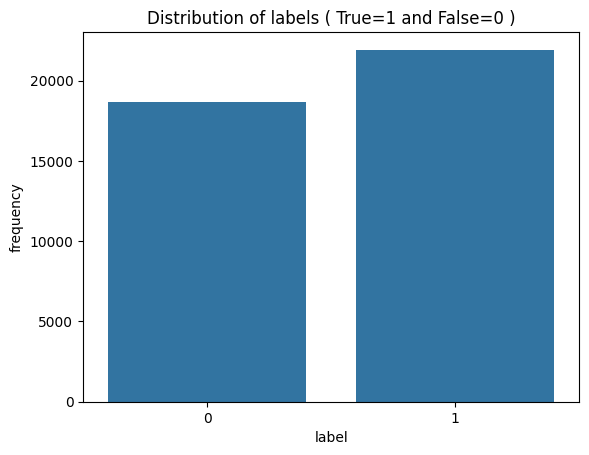

In [12]:
sns.countplot(data=df, x='label')
plt.title('Distribution of labels ( True=1 and False=0 )')
plt.xlabel('label')
plt.ylabel('frequency')
plt.show()

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

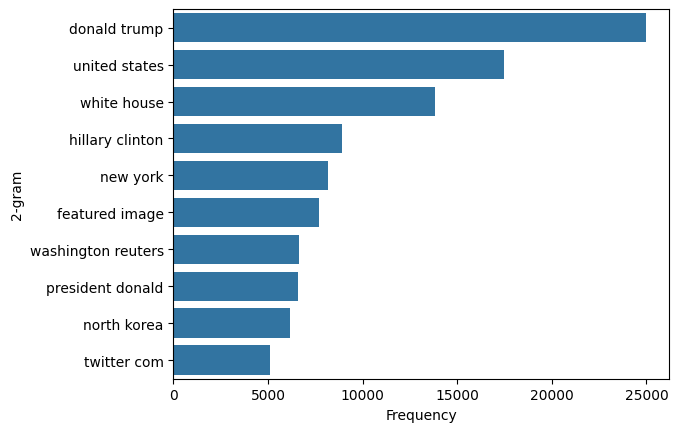

In [14]:
def plot_top_ngrams(text_data, n=2, top_n = 20):
    vectorizer = CountVectorizer(ngram_range=(n,n), stop_words='english')
    ngrams = vectorizer.fit_transform(text_data.dropna())
    ngram_counts = pd.DataFrame(ngrams.sum(axis=0), columns=vectorizer.get_feature_names_out(), index=['count']).T
    top_ngrams = ngram_counts.nlargest(top_n, 'count')

    #plot the n-grams diagram
    sns.barplot(data=top_ngrams.reset_index(), x='count', y='index')
    plt.xlabel(f'Top {top_n} {n}-grams')
    plt.xlabel('Frequency')
    plt.ylabel(f'{n}-gram')
    plt.show()

# plot top 2-grams for text column
plot_top_ngrams(df['text'], n=2, top_n=10)

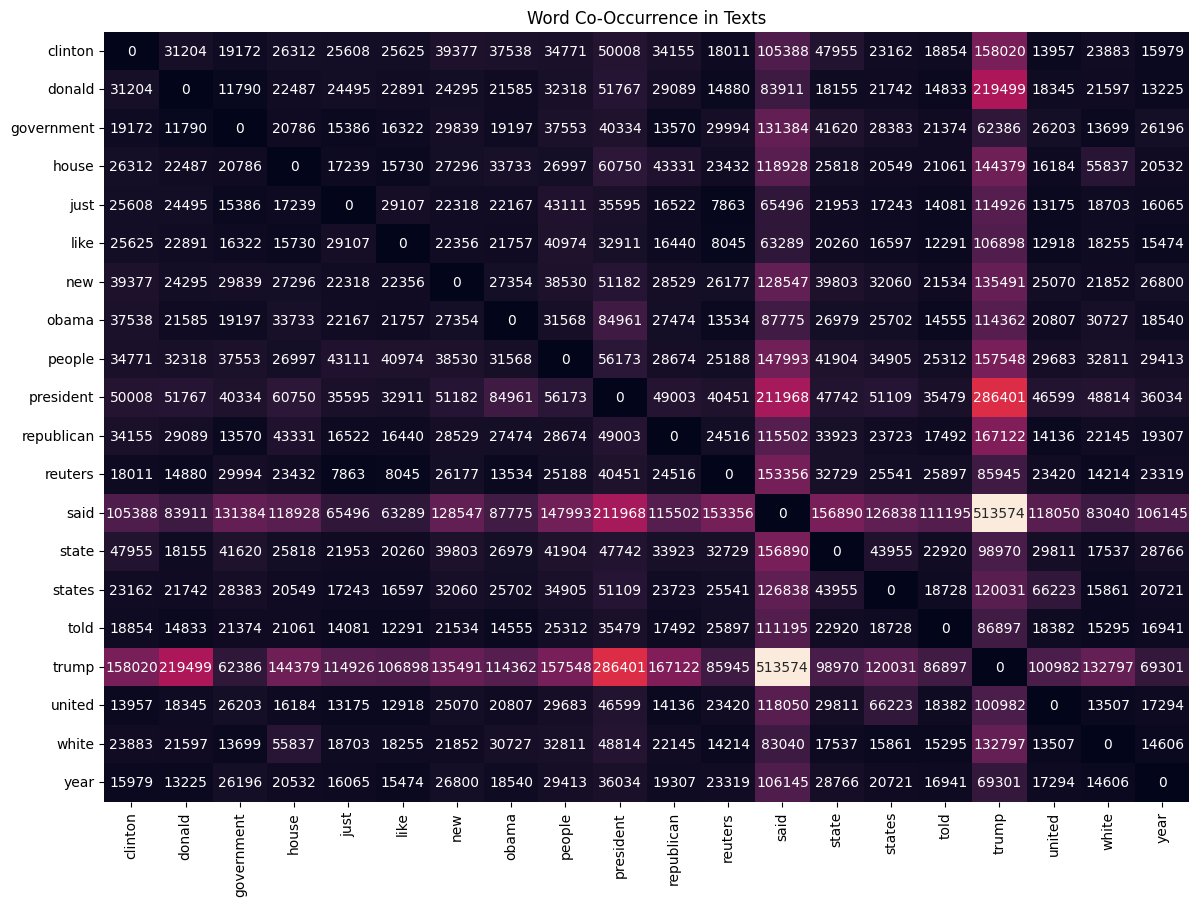

In [15]:
# initialize CountVectorizer to get word co-occurrence
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['text'].dropna())
word_cooccurrence = (X.T * X)  # multiply term-document matrix by its transpose to get co-occurrence
word_cooccurrence.setdiag(0)  # remove diagonal (self-co-occurrence)

# convert to DataFrame for heatmap
word_cooccurrence_df = pd.DataFrame(word_cooccurrence.toarray(), index=vectorizer.get_feature_names_out(), columns=vectorizer.get_feature_names_out())

# plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(data=word_cooccurrence_df, 
            annot=True,
            cbar=False,
            fmt='d')
plt.title('Word Co-Occurrence in Texts')
plt.show()

In [19]:
from wordcloud import WordCloud

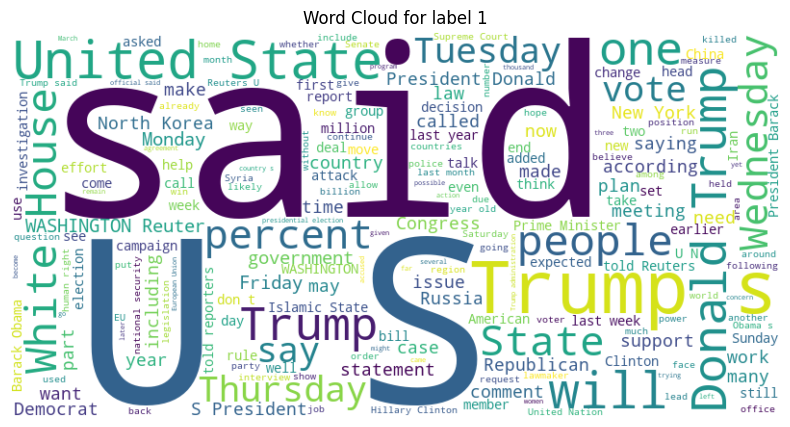

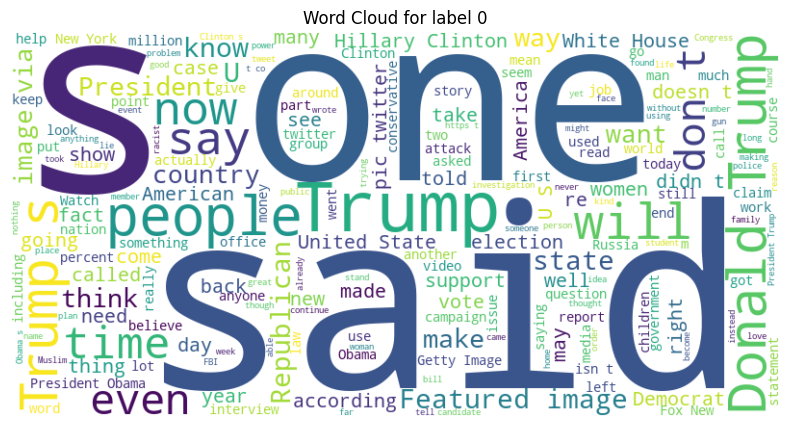

In [21]:
def plot_wordCloud(label):
    text = ' '.join(df[df['label']==label]['text'].fillna('').tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for label {label}')
    plt.show()

for label in df['label'].unique():
    plot_wordCloud(label)


In [23]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

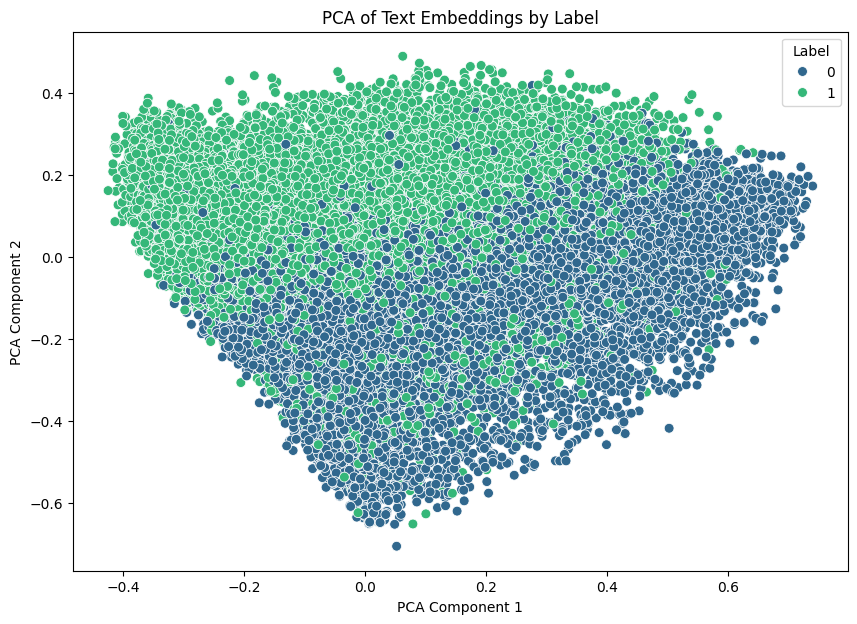

In [24]:
# create TF-IDF embeddings
tfidf = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = tfidf.fit_transform(df['text'].fillna(''))

# apply PCA to reduce to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# create scatter plot of PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['label'], palette="viridis", s=50)
plt.title('PCA of Text Embeddings by Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Label')
plt.show()

## Pytorch Model

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score
from torch.utils.data import DataLoader, TensorDataset
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
# device selection: MPS (for macOS with Apple Silicon), CUDA, or CPU
device = 'mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using Device: {device}')

Using Device: cpu


In [30]:
class FakeNewsBinaryClassifier(nn.Module):
    def __init__(self, input_dim):
        super(FakeNewsBinaryClassifier, self).__init__()
        self.network = nn.Sequential(nn.Linear(input_dim, 128),
                                     nn.ReLU(),
                                     nn.Linear(128, 64),
                                     nn.ReLU(),
                                     nn.Linear(64, 1),
                                     nn.Sigmoid())

    def forward(self, x):
        return self.network(x)

In [31]:
# combine title and text columns, then vectorize them
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['title'] + " " + df['text']).toarray()
y = df['label'].values  # labels for training

In [32]:
# convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

In [33]:
X_tensor.shape

torch.Size([40587, 1000])

In [34]:
y_tensor.shape

torch.Size([40587, 1])

In [35]:
# move tensors to the selected device
X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)

In [36]:
num_epochs = 5
kf = KFold(n_splits=5, shuffle=True, random_state=101)
fold_results = []
best_accuracy = 0
best_auc = 0  # initialize best AUC score
best_model_state = None  # initialize to store the best model state

# 5-Fold Cross-Validation
for fold, (train_idx, val_idx) in enumerate(kf.split(X_tensor)):
    print(f"Fold {fold+1}")

    # split data for this fold
    X_train, X_val = X_tensor[train_idx], X_tensor[val_idx]
    y_train, y_val = y_tensor[train_idx], y_tensor[val_idx]

    # DataLoader for the current fold
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

    # initialize model, loss function, and optimizer for each fold
    model = FakeNewsBinaryClassifier(input_dim=1000).to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # training loop for each fold
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # move inputs and labels to device
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

    # evaluate on the validation set
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_preds = (val_outputs >= 0.5).float()

        # calculate metrics for the current fold
        accuracy = accuracy_score(y_val.cpu(), val_preds.cpu())
        auc = roc_auc_score(y_val.cpu(), val_outputs.cpu())
        print(f'Fold {fold+1} Accuracy: {accuracy:.4f}, AUC: {auc:.4f}')

        # store results for this fold
        fold_results.append((accuracy, auc))

        # save the model if it's the best based on AUC
        if auc > best_auc:
            best_accuracy = accuracy
            best_auc = auc
            best_model_state = model.state_dict()  # save the best model's state_dict

Fold 1
Epoch 1/5, Loss: 0.0081
Epoch 2/5, Loss: 0.0101
Epoch 3/5, Loss: 0.0002
Epoch 4/5, Loss: 0.0017
Epoch 5/5, Loss: 0.0001
Fold 1 Accuracy: 0.9756, AUC: 0.9961
Fold 2
Epoch 1/5, Loss: 0.0006
Epoch 2/5, Loss: 0.0000
Epoch 3/5, Loss: 0.0072
Epoch 4/5, Loss: 0.0000
Epoch 5/5, Loss: 0.0000
Fold 2 Accuracy: 0.9749, AUC: 0.9948
Fold 3
Epoch 1/5, Loss: 0.0011
Epoch 2/5, Loss: 0.1170
Epoch 3/5, Loss: 0.0428
Epoch 4/5, Loss: 1.5191
Epoch 5/5, Loss: 0.0000
Fold 3 Accuracy: 0.9735, AUC: 0.9956
Fold 4
Epoch 1/5, Loss: 0.0009
Epoch 2/5, Loss: 0.0000
Epoch 3/5, Loss: 0.0010
Epoch 4/5, Loss: 0.0031
Epoch 5/5, Loss: 0.0156
Fold 4 Accuracy: 0.9745, AUC: 0.9961
Fold 5
Epoch 1/5, Loss: 0.0033
Epoch 2/5, Loss: 0.0077
Epoch 3/5, Loss: 0.0004
Epoch 4/5, Loss: 0.0040
Epoch 5/5, Loss: 0.0001
Fold 5 Accuracy: 0.9760, AUC: 0.9964


In [37]:
# calculate average metrics across all folds
average_accuracy = np.mean([result[0] for result in fold_results])
average_auc = np.mean([result[1] for result in fold_results])

# provide results
print(f'5-Fold Cross-Validation Results')
print(f'Average Accuracy: {average_accuracy:.4f}')
print(f'Average AUC: {average_auc:.4f}')

5-Fold Cross-Validation Results
Average Accuracy: 0.9749
Average AUC: 0.9958


In [38]:
# after cross-validation, save the best model
if best_model_state is not None:
    torch.save(best_model_state, 'fake_news_classifier.pth')
    print(f'Best Model w/ Accuracy: {best_accuracy:.4f}, AUC: {best_auc:.4f}')

Best Model w/ Accuracy: 0.9760, AUC: 0.9964
